Objective: 
Propose a model determining the terminal velocity of a raindrop falling from
a stationary cloud.

Relevant Variables: 
v_terminal: Terminal velocity of the raindrop (where gravitational force and the drag force are equal)
R: Raindrop radius
ρ_raindrop: Raindrop density
ρ_air: Air density
μ_air: Dynamic viscosity of air
g: Acceleration due to gravity
C_d: Drag coefficient
Re: Reynolds number where Re = (2* R * v * ρ_air) / μ_air
f(): A function that combines the relationships among the variables to solve for terminal velocity

Generic model:
v_terminal(R, ρ_raindrop, ρ_air, g, μ_air) = f(C_d(Re), Re, R, ρ_raindrop, ρ_air, g, μ_air)

Assumptions: 
raindrop is a perfect sphere, all the forces acting on the raindrop remain constant throughout its descent, drag coefficient is consistent and uninfluenced during descent

Objective: 
Propose a model for the volume flow rate dV/dt of blood flowing in an artery as a function of the pressure P drop per unit length of artery, the radius r, the blood density ρ and the blood viscosity µ.

Relevant variables:
dV/dt: Rate of volume of blood flow in artery
µ: Blood viscosity
r: Artery radius
L: Length of artery
P': Pressure drop per unit length of the artery
ρ: Blood density
v_avg: average flow velocity

Generic model:
dV/dt(r, P', µ, ρ) = π * r^2 * v_avg(P', r, µ, ρ)

Assumptions:
blood flow is laminar; continuous, artery is a cylindrical pipe

Objective: Write a code to solve the wave equations, given the initial and boundary conditions.

Equation:
u(x,t)[(1)/(Deltat^(2))-(c^(2))/(Deltax^(2))]=(2u(x,t-Delta t)-mu(x,-2Delta t))/(Deltat^(2))+c^(2)[(-2u(x-Delta x,t)+u(x,-2Delta xt))/(Deltax^(2))]

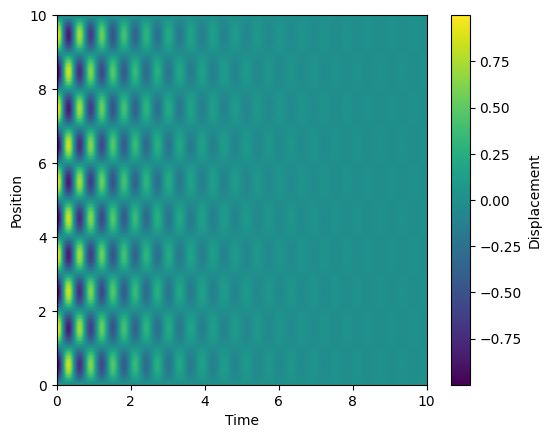

In [12]:
import numpy as np
import matplotlib.pyplot as plt

L_domain = 10
T_sim = 10
Spatial_points = 100
Time_steps = 1000
Wave_speed = 1

dx = L_domain / Spatial_points # spatial step
dt = T_sim / Time_steps # time step

array = np.zeros((Spatial_points, Time_steps))

array[:, 0] = np.sin(np.pi * np.linspace(0, L_domain, Spatial_points))  # initial displacement
array[:, 1] = array[:, 0] + dt * np.zeros(Spatial_points)  # initial velocity
array[0, :] = 0 # boundary conditions

# using finite-difference to solve for values of displacement at each postition and time step
for n in range(1, Time_steps - 1):
    for i in range(1, Spatial_points - 1):
        array[i, n + 1] = (2 * array[i, n] - array[i, n - 1] + Wave_speed**2 * dt**2 * (array[i + 1, n] - 2 * array[i, n] + array[i - 1, n]) / dx**2) / (1 + Wave_speed**2 * dt**2 / dx**2)

plt.imshow(array, extent=[0, T_sim, 0, L_domain], cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Position')
plt.colorbar(label='Displacement')
plt.show()